In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
# 'confirmed', 'deaths', 'recovered'
series_category = 'deaths'
history = pd.read_csv('output/step_one/'+series_category+'/' + 'history.csv', index_col=0)
median = pd.read_csv('output/step_one/'+series_category+'/' + 'median.csv', index_col=0)
quantile10 = pd.read_csv('output/step_one/'+series_category+'/' + 'quantile10.csv', index_col=0)
quantile90 = pd.read_csv('output/step_one/'+series_category+'/' + 'quantile90.csv', index_col=0)
quantile35 = pd.read_csv('output/step_one/'+series_category+'/' + 'quantile35.csv', index_col=0)
quantile65 = pd.read_csv('output/step_one/'+series_category+'/' + 'quantile65.csv', index_col=0)

history.index = pd.to_datetime(history.index)
median.index = pd.to_datetime(median.index)
quantile10.index = pd.to_datetime(quantile10.index)
quantile90.index = pd.to_datetime(quantile90.index)
quantile35.index = pd.to_datetime(quantile35.index)
quantile65.index = pd.to_datetime(quantile65.index)

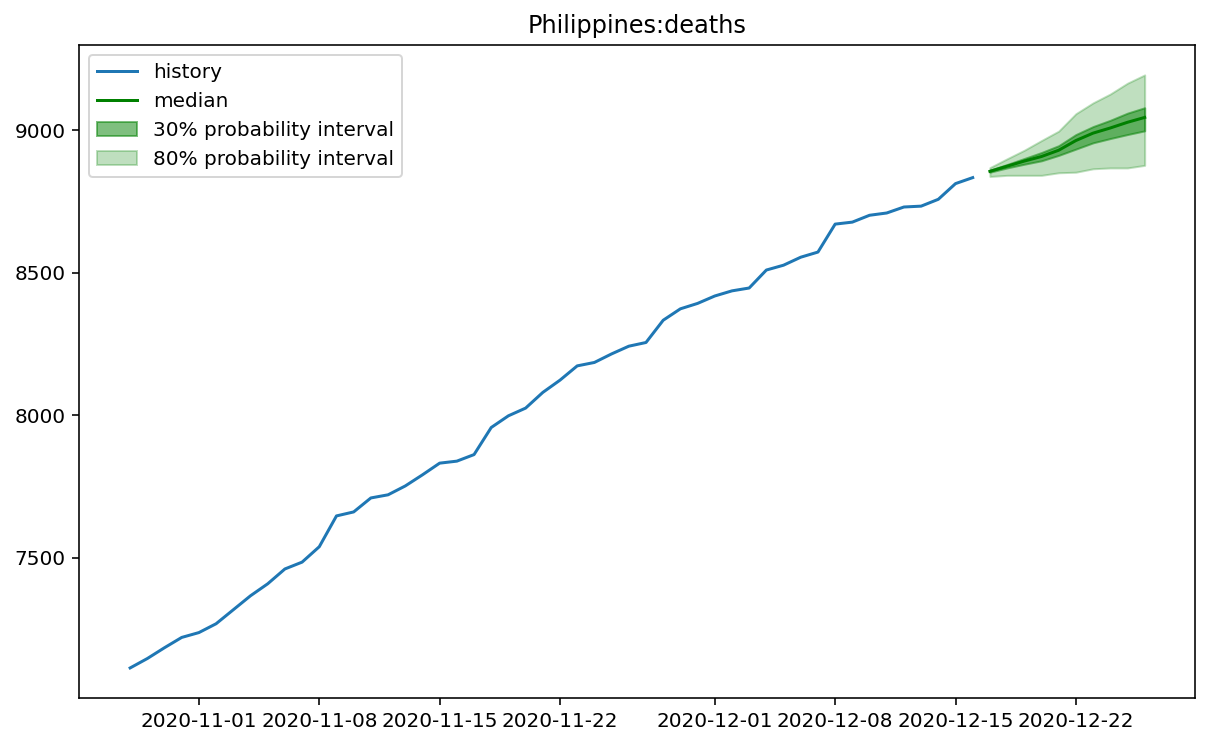

In [109]:
country = 'Philippines'
color = 'green'
plt.figure(figsize=(10,6))
plt.plot(history[country].iloc[-50:], '-', label='history')
plt.plot(median[country], color=color, label='median')
plt.fill_between(quantile35[country].index,quantile35[country],quantile65[country],color=color, alpha=0.5, label='30% probability interval')
plt.fill_between(quantile10[country].index,quantile10[country],quantile90[country],color=color, alpha=0.25, label='80% probability interval')
plt.title(country + ':' + series_category)
plt.legend(loc='upper left')

In [103]:
median

,Afghanistan,Argentina,Bangladesh,Belize,Bhutan,Bolivia,Brazil,Brunei,Cambodia,Chile,...,Panama,Paraguay,Peru,Philippines,Singapore,Sri Lanka,Suriname,Thailand,Uruguay,Venezuela
2020-12-17,38523,1352390,432656,4717,410,127172,6272016,148,327,551374,...,167982,69344,926417,420271,58253,26287,5242,4003,7374,103779
2020-12-18,38545,1357045,435863,4796,411,127381,6299239,148,330,552799,...,169432,70038,928320,420713,58259,26874,5245,4018,7591,104093
2020-12-19,38600,1361441,439060,4875,413,127583,6327346,148,334,554459,...,170932,70749,930199,421739,58268,27481,5248,4031,7833,104388
2020-12-20,38633,1365933,442268,4955,414,127783,6357012,148,337,556058,...,172401,71472,931814,423453,58276,28075,5251,4046,8071,104677
2020-12-21,38685,1370393,445321,5035,415,127993,6381066,148,341,557661,...,173855,72134,933542,423815,58283,28602,5254,4059,8292,104967
2020-12-22,38735,1374699,448476,5121,416,128218,6414556,148,345,559296,...,175306,72842,935871,424574,58297,29186,5258,4074,8533,105254
2020-12-23,38776,1378904,451938,5206,417,128434,6446362,148,347,560948,...,176740,73550,938521,425354,58301,29799,5262,4090,8758,105519
2020-12-24,38777,1383557,455202,5283,418,128660,6474518,148,350,562404,...,178095,74264,940886,426928,58314,30352,5265,4109,9026,105782
2020-12-25,38842,1388291,458551,5372,419,128880,6499099,148,354,563862,...,179541,74997,943107,427520,58334,31016,5269,4127,9269,106075
2020-12-26,38867,1392730,461542,5441,420,129097,6525102,148,357,565668,...,180943,75614,945540,427554,58352,31515,5272,4142,9513,106414


In [110]:
buy_list_dict = {"0": ["603501.SH", "002841.SZ"]}

In [115]:
tmp = {}
for d in buy_list_dict:
    tmp.update({int(d): buy_list_dict[d]})
    
    

In [116]:
tmp

{0: ['603501.SH', '002841.SZ']}